Linerar regration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the house price dataset and check for null data

In [ ]:
data=pd.read_csv('/content/Housing (1).csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.shape

(545, 13)

In [ ]:
data["mainroad"]=data["mainroad"].replace({'yes':1,'no':0}).astype(int)
data["guestroom"]=data["guestroom"].replace({'yes':1,'no':0}).astype(int)
data["basement"]=data["basement"].replace({'yes':1,'no':0}).astype(int)
data["hotwaterheating"]=data["hotwaterheating"].replace({'yes':1,'no':0}).astype(int)
data["airconditioning"]=data["airconditioning"].replace({'yes':1,'no':0}).astype(int)
data["prefarea"]=data["prefarea"].replace({'yes':1,'no':0}).astype(int)
data["furnishingstatus"]=data["furnishingstatus"].replace({'furnished':2,'semi-furnished':1,'unfurnished':0}).astype(int)

In [ ]:
corr = data.corr()
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


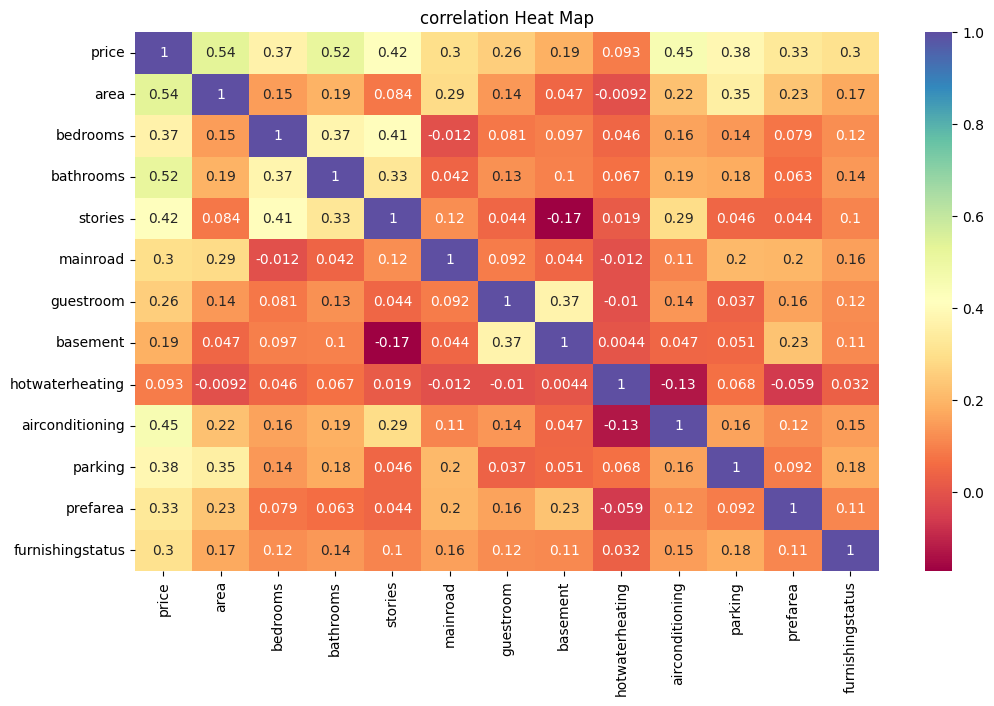

In [ ]:
price_corr=data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(price_corr,annot=True, cmap='Spectral')
plt.title('correlation Heat Map')
plt.show()

1.2122388370279802

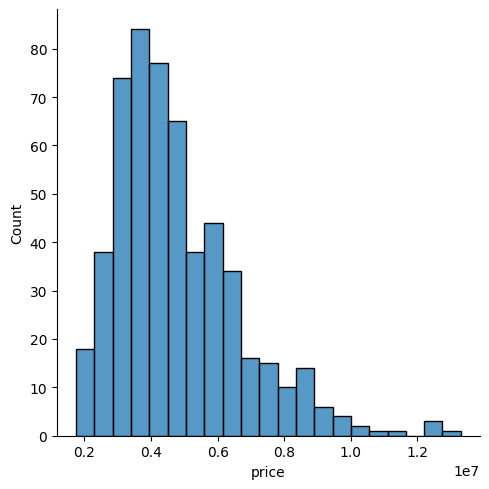

In [ ]:
sns.displot(data['price'])
data['price'].skew()

<Axes: ylabel='area'>

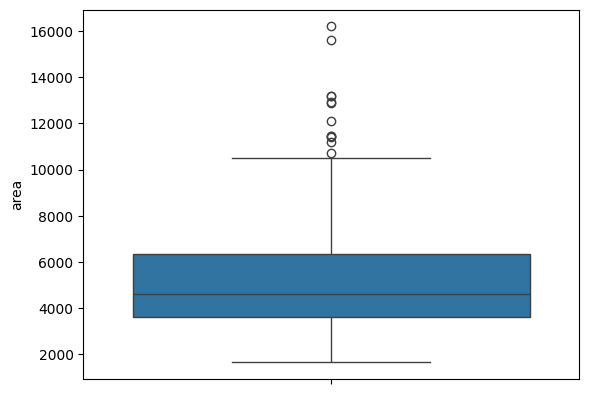

In [ ]:
sns.boxplot(data['area'])

**Qyantile Outlier Detection**

In [ ]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3-Q1
IQR, Q1, Q3

(2310000.0, 3430000.0, 5740000.0)

In [ ]:
upper_bound = Q3 + 3*IQR
lower_bound = Q1 - 3*IQR

data = data[(data['price']<= upper_bound) & (data['price']>= lower_bound)]

**accuracy gets lower when outlier detection is used on "area"**

In [ ]:
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3-Q1
IQR, Q1, Q3

(2764.0, 3596.0, 6360.0)

In [ ]:
upper_bound = Q3 + 3*IQR
lower_bound = Q1 - 3*IQR

data = data[(data['area']<= upper_bound) & (data['area']>= lower_bound)]

**Model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = data.drop(['price'], axis=1)
y = data['price']

In [ ]:
scalar = StandardScaler()

x_scale = scalar.fit_transform(x)

In [ ]:
random = RandomForestRegressor()
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_scale,y, test_size= 0.2 , random_state=2)

In [ ]:
reg.fit(x_train,y_train)
random.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_random = random.predict(x_test)
y_pred_reg = reg.predict(x_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))

MAE: 793903.7820286226
MSE: 1206358026840.2197
RMSE: 1098343.3100994513


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_reg)

0.6762352111174674

In [ ]:
r2_score(y_test, y_pred_random)

0.6366358065918822